# The Problem

Artificial neural network is no magic. The main purpose of neural network (and any classical machine learning algorithm) is to find out `magic numbers` in order to find out the best `classifier` or `regressor`.

Suppose we have the following data:

```
age height weight
50  170    75
40  180    ?
```

Now, we want to know the weight of someone whose age is `40`, and height is `180`.

This is a regression problem. Mathematically you can formulate the problem as follow:

$$weight = w1.age + w2.height + w3$$

Now our goal is to find out 3 magic numbers, `w1`, `w2`, and `w3`.

# A simple approach (Non-neural-network)

You might be tempted to solve the equation using pure `algebra`. Since we have single data with three variables (aka: the magic numbers), I think we can't solve the equation with pure algebra.

So, let's solve the using brute-force experiments!!!

## Finding the regressor

First of all, we have to define our `loss function` (how far we are from the target). In our case, the loss function is as follow:

$$error = |actual\_weight - predicted\_weight|$$
$$error = |actual\_weight - (w1.age + w2.height + w3)|$$

Let's implement the loss function in Python:

In [62]:
def loss_function(actual_weight, w1, age, w2, height, w3):
    error = abs(actual_weight - (w1*age + w2*height + w3))
    return error

Now, let's try to assign `1`-`100` to `w1`, `w2`, and `w3` in order to get the best numbers for each of them

In [71]:
age = 50.0
height = 170.0
actual_weight = 75.0
best_error = 0 # error threshold, we are only interested for error that is less or equal to 0

for w1 in range(-101, 101):
    for w2 in range(-100, 101):
        for w3 in range(-100, 101):
            error = loss_function(actual_weight, w1, age, w2, height, w3)
            if error <= best_error:
                best_error = error
                print("error:", error, "w1:", w1, "w2:", w2, "w3:", w3)


error: 0.0 w1: -101 w2: 30 w3: 25
error: 0.0 w1: -100 w2: 30 w3: -25
error: 0.0 w1: -99 w2: 29 w3: 95
error: 0.0 w1: -99 w2: 30 w3: -75
error: 0.0 w1: -98 w2: 29 w3: 45
error: 0.0 w1: -97 w2: 29 w3: -5
error: 0.0 w1: -96 w2: 29 w3: -55
error: 0.0 w1: -95 w2: 28 w3: 65
error: 0.0 w1: -94 w2: 28 w3: 15
error: 0.0 w1: -93 w2: 28 w3: -35
error: 0.0 w1: -92 w2: 27 w3: 85
error: 0.0 w1: -92 w2: 28 w3: -85
error: 0.0 w1: -91 w2: 27 w3: 35
error: 0.0 w1: -90 w2: 27 w3: -15
error: 0.0 w1: -89 w2: 27 w3: -65
error: 0.0 w1: -88 w2: 26 w3: 55
error: 0.0 w1: -87 w2: 26 w3: 5
error: 0.0 w1: -86 w2: 26 w3: -45
error: 0.0 w1: -85 w2: 25 w3: 75
error: 0.0 w1: -85 w2: 26 w3: -95
error: 0.0 w1: -84 w2: 25 w3: 25
error: 0.0 w1: -83 w2: 25 w3: -25
error: 0.0 w1: -82 w2: 24 w3: 95
error: 0.0 w1: -82 w2: 25 w3: -75
error: 0.0 w1: -81 w2: 24 w3: 45
error: 0.0 w1: -80 w2: 24 w3: -5
error: 0.0 w1: -79 w2: 24 w3: -55
error: 0.0 w1: -78 w2: 23 w3: 65
error: 0.0 w1: -77 w2: 23 w3: 15
error: 0.0 w1: -76 w2: 23 w3: 

Perfect, we have several predictors!!! 

Let's take the first one: `w1=-100`, `w2=30`, and `w3=-25`

For `age=50`, `height=170`, we get

$$prediction\_weight = -100 . 50 + 30 . 170 - 25 . 1$$
$$prediction\_weight = -5000 + 5100 - 25$$
$$prediction\_weight = 75$$

The `prediction_weight` is equal to `actual_weight`!!!

## Using the regressor

Finally, for `age=40` and `weight=180`, we get this:

$$prediction\_weight = -100.40 + 30.180 - 25.1$$
$$prediction\_weight = -4000 + 5400 - 25$$
$$prediction\_weight = 1375$$

Well, not so make sense, probably we need to use another available predictor.

__Note:__ If your problem can be perfectly solved with pure-algebra/brute-force. Just use them for your own good. Neural network or any other machine learning algorithm, should only be used if the solution is not obvious.

## What just happened?

We have just jump into a problem named `overfitting`. Overfitting is a problem where our predictor/regressor is correct for the training data, but incorrect for the testing data.

Another problems with our approach are:

* we naively believe that w1, w2, and w3 are integer
* we naively believe that the predictor is a straight linear line. Probably we need some logarithm, power, and other eccentric operations in order to get the correct predictor/classifier

Neural networks can definitely solve our two last problems. Overfitting is still a common problem in machine learning.

# Neural Network approach

As already stated, neural network is no magic.

In our previous approach, the regressor is formulated as follow: 

$$weight = w1.age + w2.height + w3$$

Suppose we have a function `f` to process the result, the regressor should looks like this:

$$weight = f(w1.age + w2.height + w3)$$

This is what a single neuron in neural network do !!!

![]()



# Neural Network implementation using Tensorflow

TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

Unlike `sklearn.neural_network`, tensorflow give us more freedom to set up our neural-network.

First of all, let's try to import tensorflow and keras (which is now also part of tensorflow)

## Importing Tensorflow and Keras

In [45]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Explore the dataset

We will try to perform classification task on mnist's dataset (http://yann.lecun.com/exdb/mnist/). The dataset contains of `70000` gray-scale images. Each image has `28 x 28` dimension and belong to one (and only one) of the following 10 classes:

In [46]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

Now, let's download `fashion_mnist` dataset from `keras.datasets` and split them into `train` and `test` set. By default, the dataset contains of `60000` training set and `10000` test set.

In [47]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Let's explore the data a little bit

Here is a bit information about our `train_labels`. It is a one-dimension array with 60000 elements

In [48]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
train_labels.shape

(60000,)

Now, let's explore our `train_images`

In [50]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [51]:
train_images.shape

(60000, 28, 28)

Just to make sure, let's see our first image and label in detail

label:  5
which is:  five


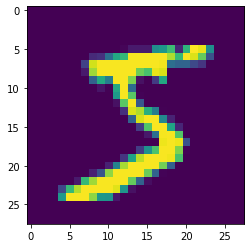

In [52]:
index = 0
label = train_labels[index]
image = train_images[index]

print("label: ", label) # this is the first train_labels
print("which is: ", class_names[label]) # use our pre-defined class_names to get textual representation of the label
plt.figure()
plt.imshow(image) # if you just want to see the matrix representation of the image, use `image` instead
plt.show()


## Configuring the neural network model

Finally, let's build our neural network.

First of all, we define 3 layers here:

* flatten layer with input_shape = 28x28: This one will transform our 2 dimensional matrix into 1 dimensional matrix (or a vector). The output of this layer will be an array with 784 elements
* dense layer containing 1024 neuron with sigmoid activation: This one will create a layer containing 128 neuron. Each of them is connected to the output of our previous layer (an array containing 784 elements). Each neuron activation is depending on `sigmoid` function (https://en.wikipedia.org/wiki/Sigmoid_function)
* dense layer containing 10 neuron with softmax activation: Finally, since we have 10 classes, it is natural to have 10 neuron in our output layer. Each neuron should show us how probable is an image belong to a particular class. Finally, we will use softmax to return the prediction result (https://en.wikipedia.org/wiki/Softmax_function)

After defining the layers, we need to define our optimizer, loss function, and metrics:

* optimizer: How to optimize. We use adam optimization (https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
* loss function: How to calculate error
* metrics: How to measure the quality of the network

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## Train the neural network model

In [54]:
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3687 - accuracy: 0.8954
Epoch 2/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2767 - accuracy: 0.9184
Epoch 3/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2467 - accuracy: 0.9273
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2285 - accuracy: 0.9304
Epoch 5/5
10000/10000 [==============================] - 1s 71us/sample - loss: 0.1969 - accuracy: 0.9367
Test accuracy: 0.9367


## Prediction

target label:  7 seven
prediction label:  7 seven


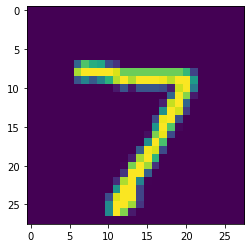

In [55]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

index = 0
prediction_label = np.argmax(predictions[0])
target_label = test_labels[index]
image = test_images[index]

print("target label: ", target_label, class_names[target_label])
print("prediction label: ", prediction_label, class_names[prediction_label])
plt.figure()
plt.imshow(image) # if you just want to see the matrix representation of the image, use `image` instead
plt.show()


# Further discussion

For classical machine learning (as this one), data preprocessing is quite important. Please look at this: https://github.com/shayan09/MNIST-Handwriting-Recognition-using-Keras/blob/master/Basic%20Keras%20NN.ipynb for comparison.